# ME314 Homework 6

### Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing 
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change" 
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

Christopher Luey


[https://colab.research.google.com/drive/161Oag-zL6fk_ROopovoNUuhf36Urmz4T?usp=sharing](https://colab.research.google.com/drive/161Oag-zL6fk_ROopovoNUuhf36Urmz4T?usp=sharing)

## Problem 1 (20pts)

Show that if $R(\theta_1)$ and $R(\theta_2)\in SO(n)$ then the product is also a rotation matrix, that is $R(\theta_1)R(\theta_2)\in SO(n)$. 
    
> Hint 1: You know this is true when $n=2$ by direct calculation in class, but for $n\neq2$ you should use the definition of $SO(n)$ to verify it for arbitrary $n$. Do not try to do this by analyzing individual components of the matrix.
    
**Turn in: A scanned (or photograph from your phone or webcam) copy of your handwritten solution. You can also use *LaTeX*. If you use SymPy, you need to include a copy of your code and the code outputs. Make sure to note why your handwritten solution / code output explains the results.**

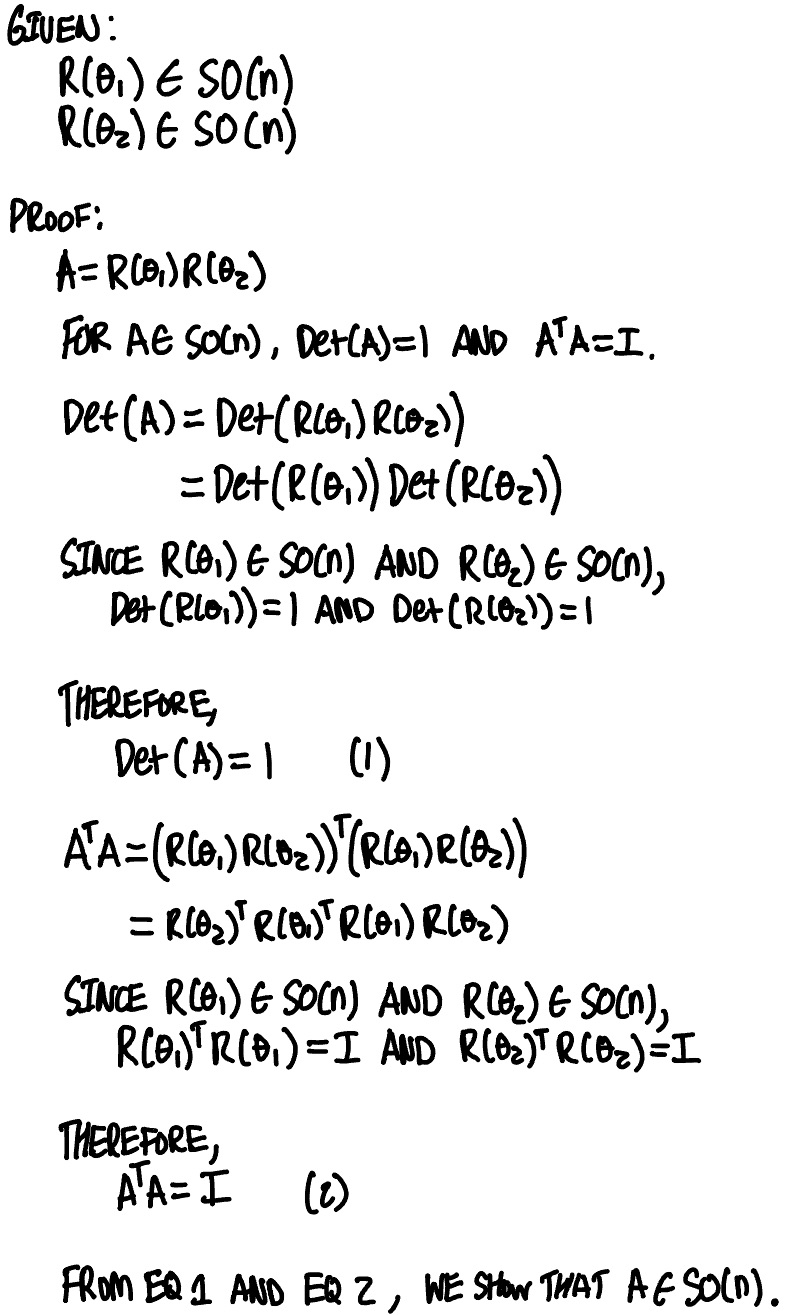

## Problem 2 (20pts)

Show that if $g(x_1,y_1,\theta_1)$ and $g(x_2,y_2,\theta_2)\in SE(2)$ then the product satisfies $g(x_1,y_1,\theta_1)g(x_2,y_2,\theta_2)\in SE(2)$. 

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use *LaTeX*. If you use SymPy, you need to include a copy of your code and the code outputs. Make sure to note why your handwritten soultion / code output explains the results.**

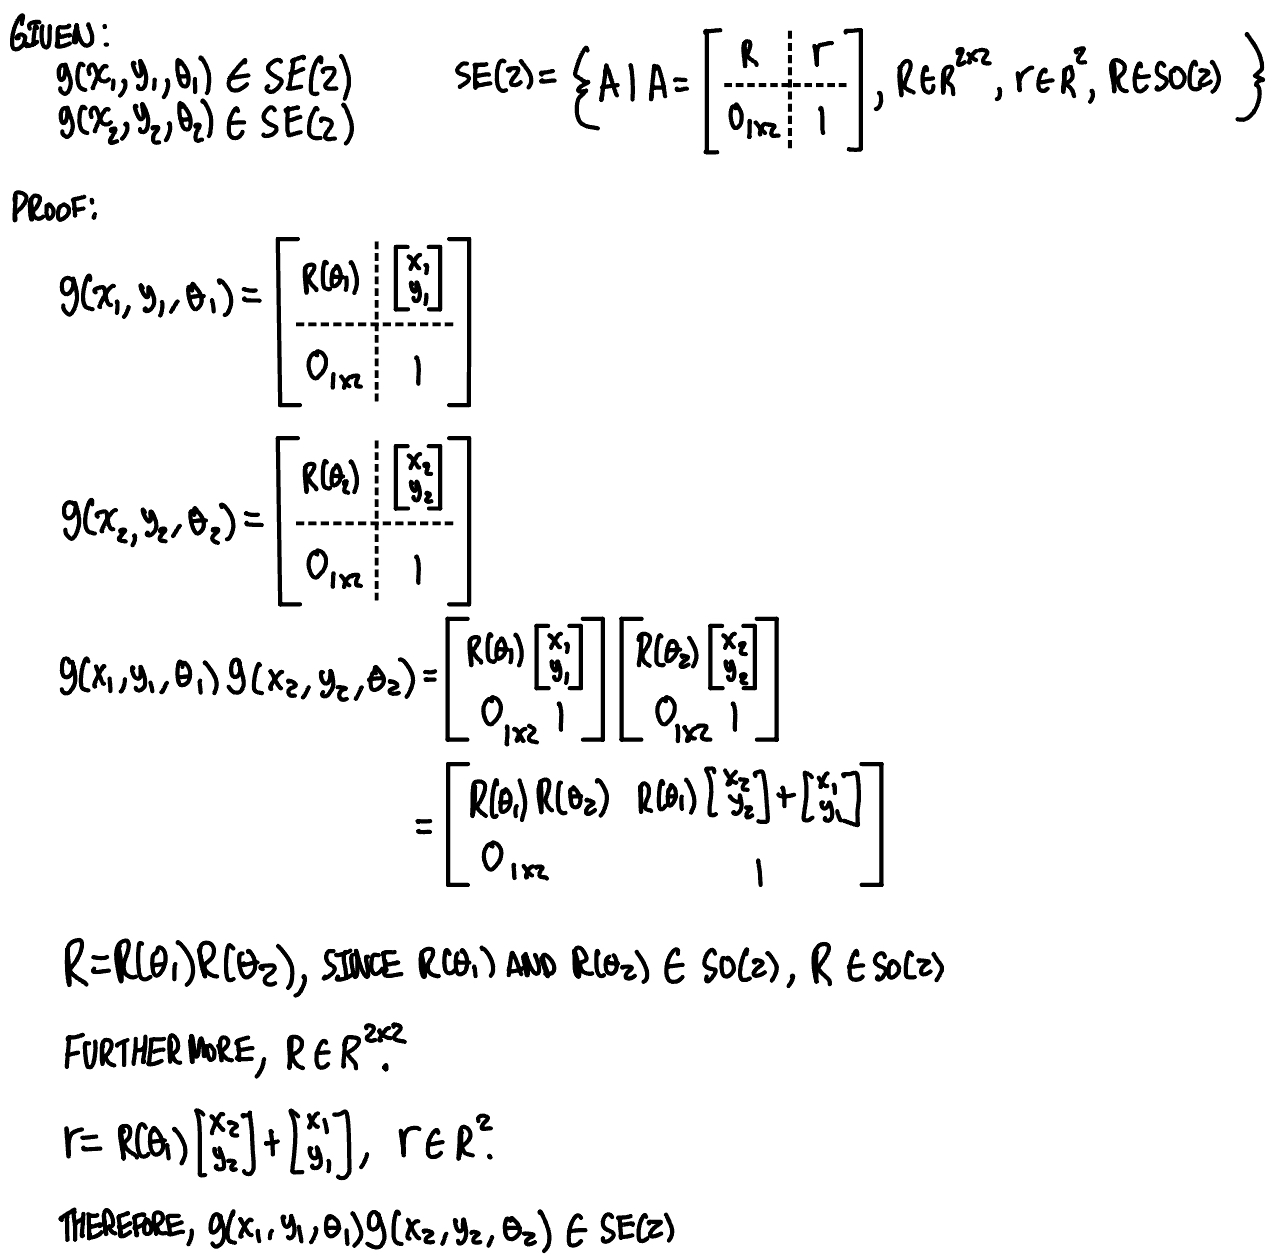

## Problem 3 (20pts)

Show that any homogeneous transformation in SE(2) can be separated into a rotation and a translation. What's the order of the two operations, which comes first? What's different if we flip the order in which we compose the rotation and translation? 
    
>Hint 1: For the rotation and translation operation, we first need to know what's the reference frame for these two operations.

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use *LaTeX*. If you use SymPy, you need to include a copy of your code and the code outputs. Make sure to note why your handwritten soultion / code output explains the results.**

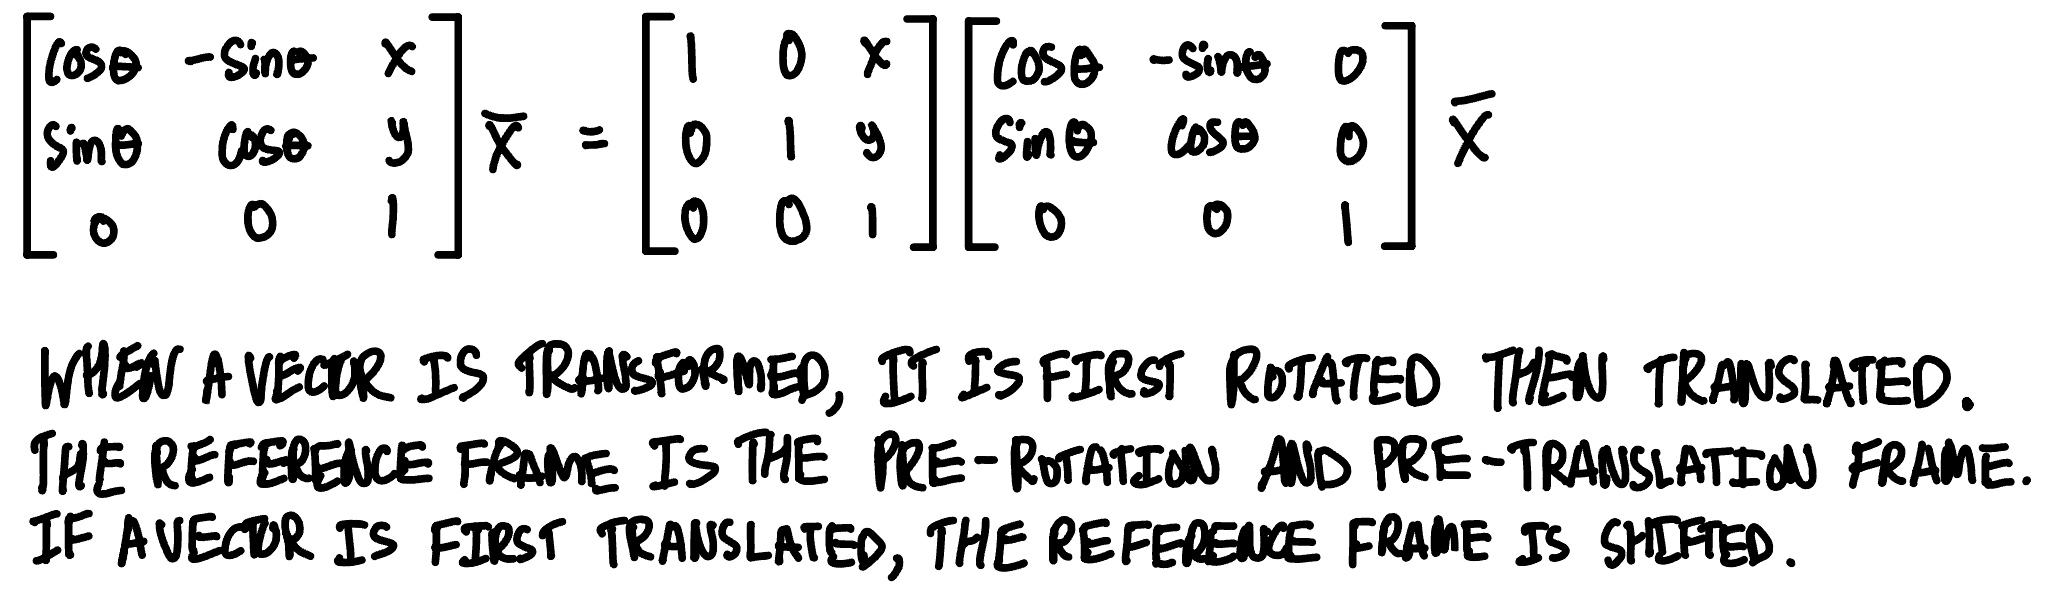

## Problem 4 (20pts)

Simulate the same double-pendulum system in previous homework using only homogeneous transformation (and thus avoid using trigonometry). Simulate the system for $t\in[0,3]$ with $dt=0.01$. The parameters are $m_1=m_2=1, R_1=R_2=1, g=9.8$ with initial conditions $\theta_1=\theta_2=-\frac{\pi}{3}, \dot{\theta}_1=\dot{\theta}_2=0$. <u>Do not use functions provided in the modern robotics package for manipulating transformation matrices such as RpToTrans(), etc.</u>

> Hint 1: Same as in the lecture, you will need to define the frames by yourself in order to compute the Lagrangian. An example is shown below.

**Turn in: Include a copy of your code used to simulate the system, and clearly labeled plot of $\theta_1$ and $\theta_2$ trajectory. Also, attach a figure showing how you defined the frames.**

In [ ]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/doubpend_frames.jpg' width=500' height='350'></table>"))

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

In [ ]:

def integrate (f, xt, dt):
  k1 = dt*f(xt)
  k2 = dt*f(xt+k1/2.)
  k3 = dt*f(xt+k2/2.)
  k4 = dt*f(xt+k3)
  new_xt = xt + (1/6.)*(k1 + 2.0*k2 + 2.0*k3 + k4)
  return new_xt

def simulate(f, x0, tspan, dt, integrate):
  N = int((max(tspan)-min(tspan))/dt)
  x = np.copy(x0)
  tvec = np.linspace(min(tspan),max(tspan),N)
  xtraj = np.zeros((len(x0),N))
  for i in range(N):
    xtraj[:,i] = integrate(f,x,dt)
    x = np.copy(xtraj[:,i])
  return xtraj

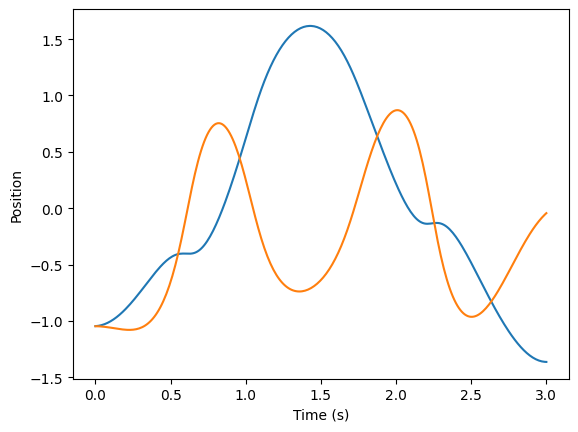

In [ ]:
m1, m2 = 1, 1
R1, R2 = 1, 1
g = 9.8
t = sym.symbols("t")
q = sym.Matrix([sym.Function("theta_1")(t), sym.Function("theta_2")(t)])

o = sym.Matrix([0,0,1])
r1 = sym.Matrix([[sym.cos(q[0]),-sym.sin(q[0]),0], [sym.sin(q[0]), sym.cos(q[0]),0], [0,0,1]])
t1 = sym.Matrix([[1,0,0], [0,1,-R1], [0,0,1]])
r2 = sym.Matrix([[sym.cos(q[1]),-sym.sin(q[1]),0], [sym.sin(q[1]), sym.cos(q[1]),0], [0,0,1]])
t2 = sym.Matrix([[1,0,0], [0,1,-R2], [0,0,1]])

l1 = (r1*t1) * o
l2 = (r1*t1*r2*t2) * o

x1 = l1[0]
x2 = l2[0]
y1 = l1[1]
y2 = l2[1]

KE = 0.5 * m1 * (x1.diff(t) ** 2 + y1.diff(t) ** 2) + 0.5 * m2 * (x2.diff(t) ** 2 + y2.diff(t) ** 2)
PE = m1 * g * y1 + m2 * g * y2
L = sym.Matrix([sym.simplify(KE - PE)])

ELEQ = sym.Eq(L.jacobian(q), L.jacobian(q.diff(t)).diff(t))
sol = sym.solve(ELEQ, q.diff(t).diff(t))


t1_func = sym.lambdify([q[0], q[1], q[0].diff(t), q[1].diff(t)], sol[q[0].diff(t).diff(t)])
t2_func = sym.lambdify([q[0], q[1], q[0].diff(t), q[1].diff(t)], sol[q[1].diff(t).diff(t)])

def dyn(s):
  return np.array([s[2], s[3], t1_func(*s), t2_func(*s)])

s0 = np.array([-np.pi/3, -np.pi/3, 0.0, 0.0])
traj = simulate(dyn, s0, [0,3], 0.01, integrate)

plt.figure()
plt.plot(np.linspace(0,3,len(traj[0])), traj[0:2].T)
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.show()

## Problem 5 (20pts)

Modify the previous animation function for the double-pendulum such that the animation shows the frames you defined in the last problem (it's similar to the ``tf`` in RViz, if you're familiar with ROS). All the *x axes* should be displayed in <font color='green'>green</font> and all the *y axes* should be displayed in <font color='red'>red</font>, with axis's length of 0.3 for all. An animation example can be found at [https://youtu.be/2H3KvRWQqys](https://youtu.be/2H3KvRWQqys). <u>Do not use functions provided in the modern robotics package for manipulating transformation matrices such as RpToTrans(), etc. </u>

> Hint 1: Each axis can be considered as a line connecting the origin and the point $[0.3, 0]$ or $[0, 0.3]$ in that frame. You will need to use the homogeneous transformations to transfer these two axis/points back into the world/fixed frame. Example code showing how to display one frame is provided below.

**Turn in: Include a copy of your code used for animation and a video of the animation. The video can be uploaded separately through Canvas, and it should be in ".mp4" format. You can either use screen capture or record the screen directly with your phone.**

In [ ]:
def animate_double_pend(theta_array,L1=1,L2=1,T=10):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation

    ###############################################
    # Define arrays containing data for frame axes
    # In each frame, the x and y axis are always fixed
    x_axis = np.array([0.3, 0.0])
    y_axis = np.array([0.0, 0.3])
    # Use homogeneous tranformation to transfer these two axes/points
    # back to the fixed frame
    frame_a_x_axis = np.zeros((2,N))
    frame_a_y_axis = np.zeros((2,N))
    frame_b_x_axis = np.zeros((2,N))
    frame_b_y_axis = np.zeros((2,N))
    frame_c_x_axis = np.zeros((2,N))
    frame_c_y_axis = np.zeros((2,N))
    frame_d_x_axis = np.zeros((2,N))
    frame_d_y_axis = np.zeros((2,N))
    for i in range(N): # iteration through each time step
        # evaluate homogeneous transformation
        t_wa = np.array([[np.cos(theta_array[0][i]), -np.sin(theta_array[0][i]), 0],
                         [np.sin(theta_array[0][i]),  np.cos(theta_array[0][i]), 0],
                         [                        0,                          0, 1]])
        # transfer the x and y axes in body frame back to fixed frame at 
        # the current time step
        frame_a_x_axis[:,i] = t_wa.dot([x_axis[0], x_axis[1], 1])[0:2]
        frame_a_y_axis[:,i] = t_wa.dot([y_axis[0], y_axis[1], 1])[0:2]


        ab = np.array([[1, 0, 0], [0, 1, -L1], [0, 0, 1]])
        frame_b_x_axis[:,i] = (t_wa.dot(ab)).dot(np.concatenate((x_axis, [1])))[0:2]
        frame_b_y_axis[:,i] = (t_wa.dot(ab)).dot(np.concatenate((y_axis, [1])))[0:2]
        
        bc = np.array([[np.cos(theta_array[1][i]), -np.sin(theta_array[1][i]), 0], [np.sin(theta_array[1][i]), np.cos(theta_array[1][i]), 0], [ 0, 0, 1]])
        frame_c_x_axis[:,i] = (t_wa.dot(ab.dot(bc))).dot(np.concatenate((x_axis, [1])))[0:2]
        frame_c_y_axis[:,i] = (t_wa.dot(ab.dot(bc))).dot(np.concatenate((y_axis, [1])))[0:2]

        cd = np.array([[1, 0, 0], [0, 1, -L2],[0, 0, 1]])
        frame_d_x_axis[:,i] = (t_wa.dot(ab.dot(bc.dot(cd)))).dot(np.concatenate((x_axis, [1])))[0:2]
        frame_d_y_axis[:,i] = (t_wa.dot(ab.dot(bc.dot(cd)))).dot(np.concatenate((y_axis, [1])))[0:2]

    ####################################
    # Using these to specify axis limits.
    xm = -3 #np.min(xx1)-0.5
    xM = 3 #np.max(xx1)+0.5
    ym = -3 #np.min(yy1)-2.5
    yM = 3 #np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[
        # note that except for the trajectory (which you don't need this time),
        # you don't need to define entries other than "name". The items defined
        # in this list will be related to the items defined in the "frames" list
        # later in the same order. Therefore, these entries can be considered as 
        # labels for the components in each animation frame
        dict(name='Arm'),
        dict(name='Mass 1'),
        dict(name='Mass 2'),
        dict(name='World Frame X'),
        dict(name='World Frame Y'),
        dict(name='A Frame X Axis'),
        dict(name='A Frame Y Axis'),
        dict(name='B Frame X Axis'),
        dict(name='B Frame Y Axis'),
        dict(name='C Frame X Axis'),
        dict(name='C Frame Y Axis'),
        dict(name='D Frame X Axis'),
        dict(name='D Frame Y Axis'),

        # You don't need to show trajectory this time,
        # but if you want to show the whole trajectory in the animation (like what
        # you did in previous homeworks), you will need to define entries other than 
        # "name", such as "x", "y". and "mode".

        # dict(x=xx1, y=yy1, 
        #      mode='markers', name='Pendulum 1 Traj', 
        #      marker=dict(color="fuchsia", size=2)
        #     ),
        # dict(x=xx2, y=yy2, 
        #      mode='markers', name='Pendulum 2 Traj', 
        #      marker=dict(color="purple", size=2)
        #     ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(autosize=False, width=1000, height=1000,
                xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation', 
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[# first three objects correspond to the arms and two masses,
                       # same order as in the "data" variable defined above (thus 
                       # they will be labeled in the same order)
                       dict(x=[0,xx1[k],xx2[k]], 
                            y=[0,yy1[k],yy2[k]], 
                            mode='lines',
                            line=dict(color='orange', width=3),
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       go.Scatter(
                            x=[xx2[k]],
                            y=[yy2[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       # display x and y axes of the fixed frame in each animation frame
                       dict(x=[0,x_axis[0]], 
                            y=[0,x_axis[1]], 
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[0,y_axis[0]], 
                            y=[0,y_axis[1]], 
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       dict(x=[0, frame_a_x_axis[0][k]], 
                            y=[0, frame_a_x_axis[1][k]], 
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[0, frame_a_y_axis[0][k]], 
                            y=[0, frame_a_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       dict(x=[xx1[k], frame_b_x_axis[0][k]], 
                            y=[yy1[k], frame_b_x_axis[1][k]], 
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[xx1[k], frame_b_y_axis[0][k]], 
                            y=[yy1[k], frame_b_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       dict(x=[xx1[k], frame_c_x_axis[0][k]], 
                            y=[yy1[k], frame_c_x_axis[1][k]], 
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[xx1[k], frame_c_y_axis[0][k]], 
                            y=[yy1[k], frame_c_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       dict(x=[xx2[k], frame_d_x_axis[0][k]], 
                            y=[yy2[k], frame_d_x_axis[1][k]], 
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[xx2[k], frame_d_y_axis[0][k]], 
                            y=[yy2[k], frame_d_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)           
    iplot(figure1)

In [ ]:
animate_double_pend(traj)

Output hidden; open in https://colab.research.google.com to view.